Please note that this notebook is intended to be run in Google Colab rather than as a Jupyter notebook on your local machine. Please click the "Open in Colab" button.

# Setup

In [ ]:
!pip install chemprop
!pip install rdkit-pypi  # should be included in above after Chemprop v1.6 release

# Download test files from GitHub
!apt install subversion
!svn export https://github.com/chemprop/chemprop.git/trunk/tests/data

import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 KB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 KB 13.1 MB/s eta 0:00:00
  Created wheel for chemprop: filename=chemprop-1.5.2-py3-none-any.whl size=149147 sha256=28683d232034f8e0d0e3440b1b4fccefdc17272ec195c31b24d4e63bfda24c7f
  Stored in directory: /root/.cache/pip/wheels/a2/38/87/cc85799850a6629e6899f94245441056aadcaf44217bba850d
  Created wheel for typed-argument-parser: filename=typed_argument_parser-1.8.0-py3-none-any.whl size=25474 sha256=fd91f4e871fd1230163c8204c2e0d916aa3b264a

In [ ]:
def plot_parity(y_true, y_pred, y_pred_unc=None):
    
    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)
    
    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))
    
    ax = plt.gca()
    ax.set_aspect('equal')
    
    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    
    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')
    
    plt.show()
    
    return

# Train regression model

In [ ]:
arguments = [
    '--data_path', 'dataset_train.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reg',
    '--epochs', '10',
    '--hidden_size_solvent', '100',
    '--dropout', '0.5',
    '--depth', '2',
    '--hidden_size', '100',
    '--hidden_size_solvent', '100',
    '--save_smiles_splits'
 
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Command line
python /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-04de2839-d5ef-4f06-94da-0d9138b20181.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': 

# Predict from file

In [ ]:
arguments = [
    '--test_path', 'dataset_train.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


5000it [00:00, 45872.98it/s]
100%|██████████| 5000/5000 [00:00<00:00, 45154.81it/s]
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 5,000


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:04<00:00,  4.97s/it]


Saving predictions to test_preds_reg.csv
Elapsed time = 0:00:07


In [ ]:
df = pd.read_csv('test_preds_reg.csv')
df['preds'] = [x[3] for x in preds]
df

,smiles,p_1,p_2,p_3,p_4,preds
0,CC1=CCCCO1,1.825073,0.397169,-2.546844,6.356696,6.356696
1,CC(=NN)N1CC1,2.573534,0.381714,-2.279846,5.945578,5.945578
2,NN1C=CCC1=O,2.896149,0.361227,-2.150547,5.284984,5.284984
3,OC(=O)C(=O)C=C,3.128399,0.337074,-1.940423,4.317309,4.317309
4,Nc1nc(F)co1,2.875757,0.387887,-1.895747,6.064136,6.064136
...,...,...,...,...,...,...
4995,NCC=CCCF,1.960802,0.406740,-2.493928,6.571226,6.571226
4996,CN(C=N)C(N)=N,2.743555,0.375038,-2.195948,5.758982,5.758982
4997,C1CC=NN=CN1,2.979070,0.362509,-2.059961,5.419615,5.419615
4998,CN1CCCN=C1,2.250198,0.389492,-2.395444,6.135922,6.135922


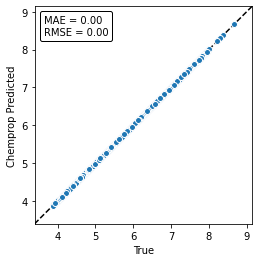

In [ ]:
plot_parity(df.p_4, df.preds)

# Predict from SMILES list

In [ ]:
smiles = [['CCC'], ['CCCC'], ['OCC']]
arguments = [
    '--test_path', '/dev/null',
    '--preds_path', '/dev/null',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args, smiles=smiles)

Loading training args


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Saving predictions to /dev/null
Elapsed time = 0:00:01


# Load model once, predict multiple times

In [ ]:
arguments = [
    '--test_path', '/dev/null',
    '--preds_path', '/dev/null',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)

model_objects = chemprop.train.load_model(args=args)

smiles = [['CCC'], ['CCCC'], ['OCC']]
preds = chemprop.train.make_predictions(args=args, smiles=smiles, model_objects=model_objects)

smiles = [['CCCC'], ['CCCCC'], ['COCC']]
preds = chemprop.train.make_predictions(args=args, smiles=smiles, model_objects=model_objects)

Loading training args
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3


100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


Saving predictions to /dev/null
Elapsed time = 0:00:00
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 3


100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

Saving predictions to /dev/null
Elapsed time = 0:00:00


# Reactions

In [ ]:
reaction_reg_df = pd.read_csv('data/reaction_regression.csv')
reaction_reg_df

,AAM,ea
0,[O:1]([C:2]([C:3]([C:4](=[O:5])[C:6]([O:7][H:1...,8.898934
1,[C:1]1([H:8])([H:9])[O:2][C@@:3]2([H:10])[C@@:...,5.464328
2,[C:1]([C@@:2]1([H:11])[C@@:3]2([H:12])[C:4]([H...,5.270552
3,[C:1]([O:2][C:3]([C@@:4]([C:5]([H:14])([H:15])...,8.473006
4,[C:1]([C:2]#[C:3][C:4]([C:5](=[O:6])[H:12])([H...,5.579037
...,...,...
495,[C:1]([c:2]1[c:3]([H:10])[n:4]([H:11])[n:5][c:...,14.662005
496,[C:1]([C@@:2]1([H:11])[N:3]([H:12])[C@:4]1([C:...,5.146017
497,[C:1]([C@@:2]1([H:10])[C:3]([H:11])([H:12])[C:...,8.362688
498,[C:1]([c:2]1[c:3]([H:11])[o:4][c:5]([O:6][H:12...,12.416359


In [ ]:
arguments = [
    '--data_path', 'data/reaction_regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reaction',
    '--epochs', '5',
    '--reaction',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-8f687a13-fd1d-4bb6-bf15-8368444c40f1.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data/reaction_regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solvent': 

In [ ]:
arguments = [
    '--test_path', 'test_checkpoints_reaction/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reaction.csv',
    '--checkpoint_dir', 'test_checkpoints_reaction'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 72666.39it/s]
100%|██████████| 50/50 [00:00<00:00, 73558.47it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 50


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

Saving predictions to test_preds_reaction.csv
Elapsed time = 0:00:01


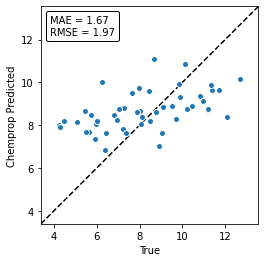

In [ ]:
df = pd.read_csv('test_checkpoints_reaction/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]

plot_parity(df.ea, df.preds)

# Multiple-Molecule Inputs

In [ ]:
multimolecule_df = pd.read_csv('data/classification_multimolecule.csv')
multimolecule_df

,mol a smiles,mol b Smiles,synergy
0,CC(C)CC1C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NCCC(C(=O...,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,1
1,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,CC(C1CCC(C(O1)OC2C(CC(C(C2O)OC3C(C(C(CO3)(C)O)...,0
2,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,CC(C)(C(=O)O)ON=C(C1=CSC(=N1)N)C(=O)NC2C3N(C2=...,0
3,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,CC(C)(C)NCC(=O)NC1=CC(=C2CC3CC4C(C(=O)C(=C(C4(...,1
4,C[C@H]([C@H]1C(=O)NCC[C@@H](C(=O)N[C@H](C(=O)N...,CN1C(=NC(=O)C(=O)N1)SCC2=C(N3C(C(C3=O)NC(=O)C(...,1
...,...,...,...
254,CC(C)CC1C(=O)NC(C(=O)N2CCCC2C(=O)NC(C(=O)NC(C(...,[N+](=O)([O-])[O-].[Ag+],0
255,CCC(C)CCCC(=O)NC(CCN)C(=O)NC(C(C)O)C(=O)NC(CCN...,C1=CC=C2C(=C1)C=CN2,1
256,CC(C)CC1C(=O)NC(C(=O)NC(C(=O)NC(C(=O)NCCC(C(=O...,CC1C2C(C(=O)N2C(=C1SC3CC(NC3)C(=O)N(C)C)C(=O)O...,1
257,CCOP(=O)(O)OP(=O)(O)O,C1=CC(=CC=C1C(C(CO)NC(=O)C(Cl)Cl)O)[N+](=O)[O-],1


In [ ]:
arguments = [
    '--data_path', 'data/classification_multimolecule.csv',
    '--dataset_type', 'classification',
    '--save_dir', 'test_checkpoints_multimolecule',
    '--epochs', '5',
    '--save_smiles_splits',
    '--number_of_molecules', '2',
    '--split_key_molecule', '1' # defaults to 0 (1st column) if not specified
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-8f687a13-fd1d-4bb6-bf15-8368444c40f1.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data/classification_multimolecule.csv',
 'data_weights_path': None,
 'dataset_type': 'classification',
 'depth': 3,
 'dep

In [ ]:
arguments = [
    '--test_path', 'test_checkpoints_multimolecule/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_multimolecule.csv',
    '--checkpoint_dir', 'test_checkpoints_multimolecule',
    '--number_of_molecules', '2',
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


26it [00:00, 60282.98it/s]
100%|██████████| 26/26 [00:00<00:00, 65183.45it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 26


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

Saving predictions to test_preds_multimolecule.csv
Elapsed time = 0:00:01


# Split Type

In [ ]:
arguments = [
    '--data_path', 'data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_splits',
    '--epochs', '5',
    '--split_type', 'scaffold_balanced',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-8f687a13-fd1d-4bb6-bf15-8368444c40f1.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data/regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solvent': 3,
 'devi

In [ ]:
arguments = [
    '--test_path', 'test_checkpoints_splits/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_splits.csv',
    '--checkpoint_dir', 'test_checkpoints_splits',
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 74552.15it/s]
100%|██████████| 50/50 [00:00<00:00, 84870.58it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 50


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

Saving predictions to test_preds_splits.csv
Elapsed time = 0:00:01


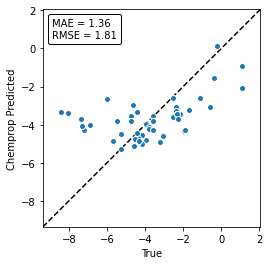

In [ ]:
df = pd.read_csv('test_checkpoints_splits/fold_0/test_full.csv')
df['preds'] = [x[0] for x in preds]

plot_parity(df.logSolubility, df.preds)

# Ensembling and Uncertainty

In [ ]:
arguments = [
    '--data_path', 'data/reaction_regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_ensemble',
    '--epochs', '5',
    '--reaction',
    '--save_smiles_splits',
    '--ensemble_size', '5',
    '--split_type', 'scaffold_balanced'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-8f687a13-fd1d-4bb6-bf15-8368444c40f1.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data/reaction_regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solvent': 

In [ ]:
arguments = [
    '--test_path', 'test_checkpoints_ensemble/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_ensemble.csv',
    '--checkpoint_dir', 'test_checkpoints_ensemble',
    '--ensemble_variance'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 78251.94it/s]
100%|██████████| 50/50 [00:00<00:00, 109626.35it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 50


  0%|          | 0/5 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



 20%|██        | 1/5 [00:00<00:01,  2.11it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



 40%|████      | 2/5 [00:00<00:01,  2.12it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



 60%|██████    | 3/5 [00:01<00:00,  2.08it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



 80%|████████  | 4/5 [00:01<00:00,  2.07it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

Saving predictions to test_preds_ensemble.csv
Elapsed time = 0:00:03


In [ ]:
preds_df = pd.read_csv('test_preds_ensemble.csv')
preds_df

,AAM,ea,ea_ensemble_uncal_var
0,[C:1]([C@@:2]1([H:10])[C@:3]([C:4]([H:12])([H:...,7.437500,0.051191
1,[C:1]([C@@:2]1([H:10])[C@:3]([C:4]([H:12])([H:...,8.662633,0.362828
2,[O:1]([C@@:2]1([H:9])[C:3]([H:10])([H:11])[N:4...,8.302808,0.073829
3,[O:1]([C:2]1([H:7])[C:3]([H:8])([H:9])[O:4][C:...,10.508875,0.356629
4,[O:1]([C:2]1([C:6](=[O:7])[H:13])[C:3]([H:9])(...,9.142585,0.174254
5,[O:1]([C:2]1([C:6](=[O:7])[H:13])[C:3]([H:9])(...,8.655645,0.116326
6,[N:1](=[C:2]1\[O:3][C@@:4]2([H:9])[C:5]([H:10]...,7.597202,0.044275
7,[N:1](=[C:2]1\[O:3][C@@:4]2([H:9])[C:5]([H:10]...,8.631742,0.175392
8,[O:1]=[C:2]1[C:3]([H:8])([H:9])[N:4]2[C:5]([H:...,9.267970,0.310400
9,[C:1]([c:2]1[c:3]([H:11])[n:4]([H:12])[c:5]([O...,8.703622,0.050446


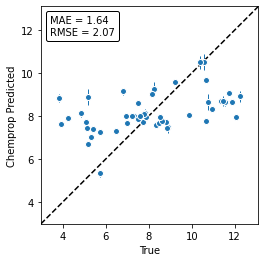

In [ ]:
df = pd.read_csv('test_checkpoints_ensemble/fold_0/test_full.csv')
plot_parity(df.ea, preds_df.ea, preds_df.ea_ensemble_uncal_var)

# Fingerprint

In [ ]:
arguments = [
    '--test_path', 'data/regression.csv',
    '--preds_path', 'test_preds_fingerprint.csv',
    '--checkpoint_dir', 'test_checkpoints_reg',
    '--fingerprint_type', 'MPN'
]

args = chemprop.args.FingerprintArgs().parse_args(arguments)
preds = chemprop.train.molecule_fingerprint.molecule_fingerprint(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


500it [00:00, 110884.15it/s]
100%|██████████| 500/500 [00:00<00:00, 70909.62it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 500
Encoding smiles into a fingerprint vector from 1 models.


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving predictions to test_preds_fingerprint.csv
Elapsed time = 0:00:01


In [ ]:
preds.squeeze().shape

(500, 300)

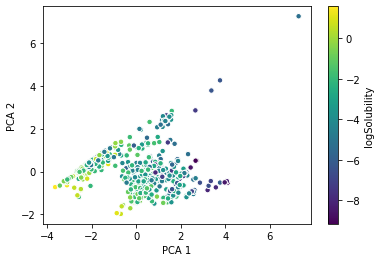

In [ ]:
df = pd.read_csv('data/regression.csv')

pca = PCA(n_components=2)
pca_xy = pca.fit_transform(preds.squeeze())
plt.scatter(pca_xy[:,0], pca_xy[:,1], s=30, c=df.logSolubility, edgecolor='w')
plt.colorbar(label='logSolubility')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Spectra

In [ ]:
arguments = [
    '--data_path', 'data/spectra.csv',
    '--dataset_type', 'spectra',
    '--save_dir', 'test_checkpoints_spectra',
    '--epochs', '5',
    '--features_path', 'data/spectra_features.csv',
    '--split_type', 'random_with_repeated_smiles',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)       

Command line
python /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-8f687a13-fd1d-4bb6-bf15-8368444c40f1.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data/spectra.csv',
 'data_weights_path': None,
 'dataset_type': 'spectra',
 'depth': 3,
 'depth_solvent': 3,
 'device': d

In [ ]:
arguments = [
    '--test_path', 'test_checkpoints_spectra/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_spectra.csv',
    '--checkpoint_dir', 'test_checkpoints_spectra',
    '--features_path', 'data/spectra_features.csv'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


20it [00:00, 21715.27it/s]
100%|██████████| 20/20 [00:00<00:00, 34923.43it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 20


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  4.55it/s]
                                             
100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

Saving predictions to test_preds_spectra.csv
Elapsed time = 0:00:01


# Pretraining / Transfer Learning

In [ ]:
arguments = [
    '--data_path', 'data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_transfer',
    '--epochs', '5',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)       

Command line
python /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-8f687a13-fd1d-4bb6-bf15-8368444c40f1.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data/regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solvent': 3,
 'devi

In [ ]:
arguments = [
    '--data_path', 'data/regression.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_transfer',
    '--epochs', '5',
    '--checkpoint_frzn', 'test_checkpoints_transfer/fold_0/model_0/model.pt'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)       

Command line
python /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-8f687a13-fd1d-4bb6-bf15-8368444c40f1.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': 'test_checkpoints_transfer/fold_0/model_0/model.pt',
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'data/regression.csv',
 'data_weights_path': None,
 'dataset_type': 'regres

Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".


  0%|          | 0/5 [00:00<?, ?it/s]Epoch 0

 75%|███████▌  | 6/8 [00:00<00:00, 24.17it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 1.297117
 20%|██        | 1/5 [00:00<00:01,  2.05it/s]Epoch 1

  0%|          | 0/8 [00:00<?, ?it/s]Loss = 3.4231e-01, PNorm = 34.0887, GNorm = 2.9127, lr_0 = 7.1875e-04

 75%|███████▌  | 6/8 [00:00<00:00, 23.03it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 1.315881
 40%|████      | 2/5 [00:00<00:01,  2.19it/s]Epoch 2

 38%|███▊      | 3/8 [00:00<00:00, 23.14it/s]Loss = 3.2340e-01, PNorm = 34.1111, GNorm = 2.3180, lr_0 = 6.1897e-04

 75%|███████▌  | 6/8 [00:00<00:00, 23.50it/s]
                                             
  0%|          | 0/1 [00:00<?, ?it/s]
                                     Validation rmse = 1.287416
 60%|██████    | 3/5 [00:01<00:00,  2.07

In [ ]:
arguments = [
    '--test_path', 'test_checkpoints_transfer/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_transfer.csv',
    '--checkpoint_dir', 'test_checkpoints_transfer',
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


50it [00:00, 110667.65it/s]
100%|██████████| 50/50 [00:00<00:00, 80381.45it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 50


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

Saving predictions to test_preds_transfer.csv
Elapsed time = 0:00:01
